In [1]:
import pandas as pd
import numpy as np

dfOutcomes = pd.read_csv("sc1_Phase1_GE_Outcome.tsv",sep="\t")
dfOutcomes.head()

,PATIENTID,SURVIVAL_STATUS
0,patient_290,1
1,patient_394,1
2,patient_81,1
3,patient_307,1
4,patient_14,1


In [2]:
dfFeatures = pd.read_csv("sc1_Phase1_GE_FeatureMatrix.tsv",sep="\t")
dfFeatures.head()

,PATIENTID,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A4GALT,A4GNT,AA06,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,patient_290,6.557793,6.453623,5.302909,12.530607,6.082401,5.667769,6.764585,6.094459,6.240895,...,7.338461,8.616562,6.587933,6.034539,7.525232,5.847143,9.426022,10.027414,8.438376,8.853557
1,patient_394,6.323015,6.305724,5.552097,13.000489,6.263721,5.347906,6.723860,6.143284,6.256355,...,8.138918,9.463643,6.233711,6.174691,8.169813,5.988549,9.988564,11.577409,8.672737,9.205295
2,patient_81,6.669421,6.414214,5.478774,12.545510,5.940785,5.639510,6.752736,6.001829,6.148274,...,7.754430,9.229166,6.288666,5.957426,8.148327,6.190679,9.531540,11.180062,8.484453,8.856021
3,patient_307,6.502573,6.508156,5.648495,12.407083,6.414991,5.493800,6.912802,6.072980,6.318908,...,6.582457,8.851282,6.672033,6.194203,7.576931,6.422759,9.057685,10.062035,8.508903,7.742661
4,patient_14,6.624505,6.911232,5.614099,10.777103,6.236386,5.512900,7.178968,6.088447,6.091908,...,7.176397,7.618780,6.086676,6.096177,7.251395,6.090243,10.298209,9.443150,8.204315,8.606522


In [3]:
dfPhenotypes = pd.read_csv("sc1_Phase1_GE_Phenotype.tsv",sep="\t")
dfPhenotypes = dfPhenotypes.replace(r'^\s*$', np.nan, regex=True)
dfPhenotypes.head()

,PATIENTID,SEX,RACE,WHO_GRADING,CANCER_TYPE
0,patient_290,NaN,NaN,II,ASTROCYTOMA
1,patient_394,NaN,NaN,NaN,GBM
2,patient_81,NaN,NaN,III,ASTROCYTOMA
3,patient_307,NaN,NaN,NaN,UNCLASSIFIED
4,patient_14,NaN,NaN,NaN,GBM


In [33]:
dfs = pd.merge(dfPhenotypes,dfOutcomes,how="inner",on="PATIENTID")
dfMerged = pd.merge(dfs,dfFeatures,how="inner",on="PATIENTID")
dfMerged.head()

,PATIENTID,SEX,RACE,WHO_GRADING,CANCER_TYPE,SURVIVAL_STATUS,A1BG,A1BG.AS1,A1CF,A2M,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,patient_290,NaN,NaN,II,ASTROCYTOMA,1,6.557793,6.453623,5.302909,12.530607,...,7.338461,8.616562,6.587933,6.034539,7.525232,5.847143,9.426022,10.027414,8.438376,8.853557
1,patient_394,NaN,NaN,NaN,GBM,1,6.323015,6.305724,5.552097,13.000489,...,8.138918,9.463643,6.233711,6.174691,8.169813,5.988549,9.988564,11.577409,8.672737,9.205295
2,patient_81,NaN,NaN,III,ASTROCYTOMA,1,6.669421,6.414214,5.478774,12.545510,...,7.754430,9.229166,6.288666,5.957426,8.148327,6.190679,9.531540,11.180062,8.484453,8.856021
3,patient_307,NaN,NaN,NaN,UNCLASSIFIED,1,6.502573,6.508156,5.648495,12.407083,...,6.582457,8.851282,6.672033,6.194203,7.576931,6.422759,9.057685,10.062035,8.508903,7.742661
4,patient_14,NaN,NaN,NaN,GBM,1,6.624505,6.911232,5.614099,10.777103,...,7.176397,7.618780,6.086676,6.096177,7.251395,6.090243,10.298209,9.443150,8.204315,8.606522


In [34]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2, SelectKBest, f_regression, RFE, mutual_info_classif
dfMerged = dfMerged[dfMerged.CANCER_TYPE != 'UNKNOWN']
dfMerged = dfMerged[dfMerged.CANCER_TYPE != 'UNCLASSIFIED']
dfMerged = dfMerged[dfMerged.CANCER_TYPE != 'MIXED']
#dfMerged = dfMerged[dfMerged.CANCER_TYPE != 'OLIGODENDROGLIOMA']
X = dfMerged
X = X.drop(columns=['PATIENTID','SEX','RACE','WHO_GRADING','CANCER_TYPE','SURVIVAL_STATUS'])
y = dfMerged.iloc[:,4]
y.value_counts()

GBM                  162
ASTROCYTOMA          110
OLIGODENDROGLIOMA     47
Name: CANCER_TYPE, dtype: int64

In [35]:
bestfeatures = SelectKBest(score_func=chi2, k=100)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Genes','Score']  #naming the dataframe columns
print(featureScores.nlargest(100,'Score'))  #print 10 best features

           Genes      Score
2940      CHI3L1  78.220016
13638       PTX3  63.244786
3311      COL3A1  56.246309
7243      IGFBP2  52.011102
356          ADM  50.634469
9952         LTF  48.634844
3299      COL1A1  47.932590
16888      TIMP1  47.115005
13067      POSTN  46.852636
4800        EMP3  46.719188
11543       NNMT  43.499630
742        ANXA1  42.232112
3300      COL1A2  37.208754
9959         LUM  36.829591
3657      CTHRC1  34.161154
10312       MCUB  32.336354
3324      COL6A3  31.998668
18210      VEGFA  31.629033
2527       CD163  31.505910
12468       PDPN  31.031185
10391      MEOX2  30.684337
3313      COL4A2  29.508827
2941      CHI3L2  29.442405
14592     S100A8  29.366611
4997      ETNPPL  28.582514
8230       LAMB1  28.435151
15803       SOD2  28.061099
9777       LOXL1  28.024006
6327       GPR17  27.979344
13986       RBP1  27.049726
...          ...        ...
3011       CHST9  19.436778
5897     GALNT13  19.407953
10487        MGP  19.279735
7978      KISS1R  19

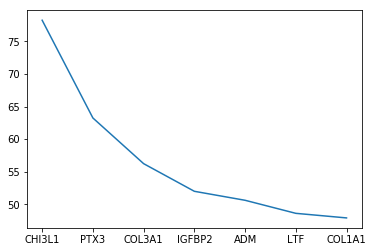

In [36]:
import matplotlib.pyplot as plt
Vals= featureScores.nlargest(7,'Score')  #print 10 best features
xVal = Vals['Genes']
yVal = Vals['Score']
plt.plot(xVal,yVal)  #print 10 best features
plt.show()


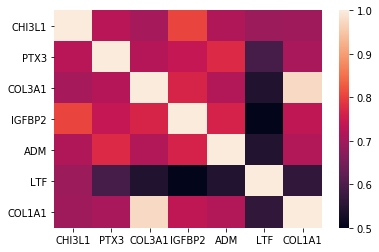

In [37]:
selCols = pd.Series(['CANCER_TYPE'])
dfSelectedY = dfMerged.loc[:,selCols]
dfSelectedX = dfMerged.loc[:,xVal[0:]]


import seaborn as sns
corrMap = dfSelectedX.corr()
sns.heatmap(corrMap)

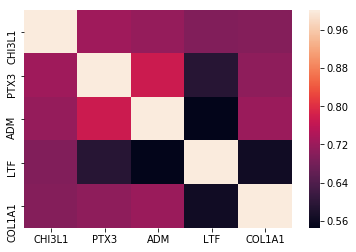

In [38]:
dfSelectedX = dfSelectedX.drop(columns=['COL3A1','IGFBP2'])
corrMap = dfSelectedX.corr()
sns.heatmap(corrMap)

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dfSelectedX, dfSelectedY, test_size=0.10, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import multilabel_confusion_matrix
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(multi_class='ovr',solver='lbfgs')
logisticRegr.fit(x_train, y_train.values.ravel())

predictions = logisticRegr.predict(x_test)
# Use score method to get accuracy of model
#print(y_test)

predY = pd.DataFrame(predictions,index= y_test.index, columns=['Predicted_type'])
#print(predY)

finalPred = pd.concat([y_test,predY],axis=1)
#print(finalPred)
#print(multilabel_confusion_matrix(y_test, predictions))

score = logisticRegr.score(x_test, y_test)
print(score)

0.6875


In [40]:
### k fold cross validation
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import multilabel_confusion_matrix

cv = KFold(n_splits=10, random_state=1, shuffle=True)
print(cv)
totScore=0
i=0
for train_index,test_index in cv.split(dfSelectedX):
    x_train, x_test = dfSelectedX.iloc[train_index], dfSelectedX.iloc[test_index]
    y_train, y_test = dfSelectedY.iloc[train_index], dfSelectedY.iloc[test_index]
    #print("TRAIN:",train_index, "TEST:",test_index)
    logisticRegr = LogisticRegression(multi_class='ovr',solver='lbfgs')
    logisticRegr.fit(x_train, y_train.values.ravel())

    predictions = logisticRegr.predict(x_test)
    # Use score method to get accuracy of model
    #print(y_test)

    predY = pd.DataFrame(predictions,index= y_test.index, columns=['Predicted_type'])
    #print(predY)

    finalPred = pd.concat([y_test,predY],axis=1)
    #print(finalPred)
    #multilabel_confusion_matrix(y_test, predictions)

    #tn,fp,fn,tp = multilabel_confusion_matrix(y_test, predictions,labels=['ASTROCYTOMA','GBM']).ravel()
    #(tn,fp,fn,tp)
    score = logisticRegr.score(x_test, y_test)
    print(score)
    
    totScore = totScore + score
    i=i+1
    
print("average", totScore/i)
    


KFold(n_splits=10, random_state=1, shuffle=True)
0.78125
0.65625
0.59375
0.75
0.59375
0.53125
0.75
0.65625
0.78125
0.6451612903225806
average 0.6738911290322581


In [41]:
### k fold cross validation
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import multilabel_confusion_matrix
cv = StratifiedKFold(n_splits=10, random_state=3, shuffle=True)
print(cv)
totScore=0
i=0
for train_index,test_index in cv.split(dfSelectedX,dfSelectedY):
    x_train, x_test = dfSelectedX.iloc[train_index], dfSelectedX.iloc[test_index]
    y_train, y_test = dfSelectedY.iloc[train_index], dfSelectedY.iloc[test_index]
    #print("TRAIN:",train_index, "TEST:",test_index)

    
        
    logisticRegr = LogisticRegression(multi_class='ovr',solver='lbfgs')
    logisticRegr.fit(x_train, y_train.values.ravel())

    predictions = logisticRegr.predict(x_test)
    # Use score method to get accuracy of model
    #print(y_test)

    predY = pd.DataFrame(predictions,index= y_test.index, columns=['Predicted_type'])
    #print(predY)

    finalPred = pd.concat([y_test,predY],axis=1)
    #print(finalPred)
    #print(multilabel_confusion_matrix(y_test, predictions))

    score = logisticRegr.score(x_test, y_test)
    print(score)
    
    totScore = totScore + score
    i=i+1
    
print("average", totScore/i)


StratifiedKFold(n_splits=10, random_state=3, shuffle=True)
0.6363636363636364
0.6363636363636364
0.625
0.71875
0.71875
0.75
0.71875
0.6129032258064516
0.6774193548387096
0.7419354838709677
average 0.6836235337243403


In [47]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',gamma='auto',decision_function_shape='ovr')
cv = StratifiedKFold(n_splits=10, random_state=3, shuffle=True)
totScore=0
i=0
for train_index,test_index in cv.split(dfSelectedX,dfSelectedY):
    x_train, x_test = dfSelectedX.iloc[train_index], dfSelectedX.iloc[test_index]
    y_train, y_test = dfSelectedY.iloc[train_index], dfSelectedY.iloc[test_index]
    clf.fit(dfSelectedX, dfSelectedY.values.ravel())
    predictions = clf.predict(x_test)

    predY = pd.DataFrame(predictions,index= y_test.index, columns=['Predicted_type'])
    #print(predY)

    finalPred = pd.concat([y_test,predY],axis=1)
    #print(finalPred)
    #print(multilabel_confusion_matrix(y_test, predictions))

    score = clf.score(x_test, y_test)
    print(score)
    
    totScore = totScore + score
    i=i+1
    
print("average", totScore/i)


0.7575757575757576
0.7272727272727273
0.71875
0.78125
0.78125
0.71875
0.8125
0.7741935483870968
0.7419354838709677
0.8064516129032258
average 0.7619929130009775


average 1.0


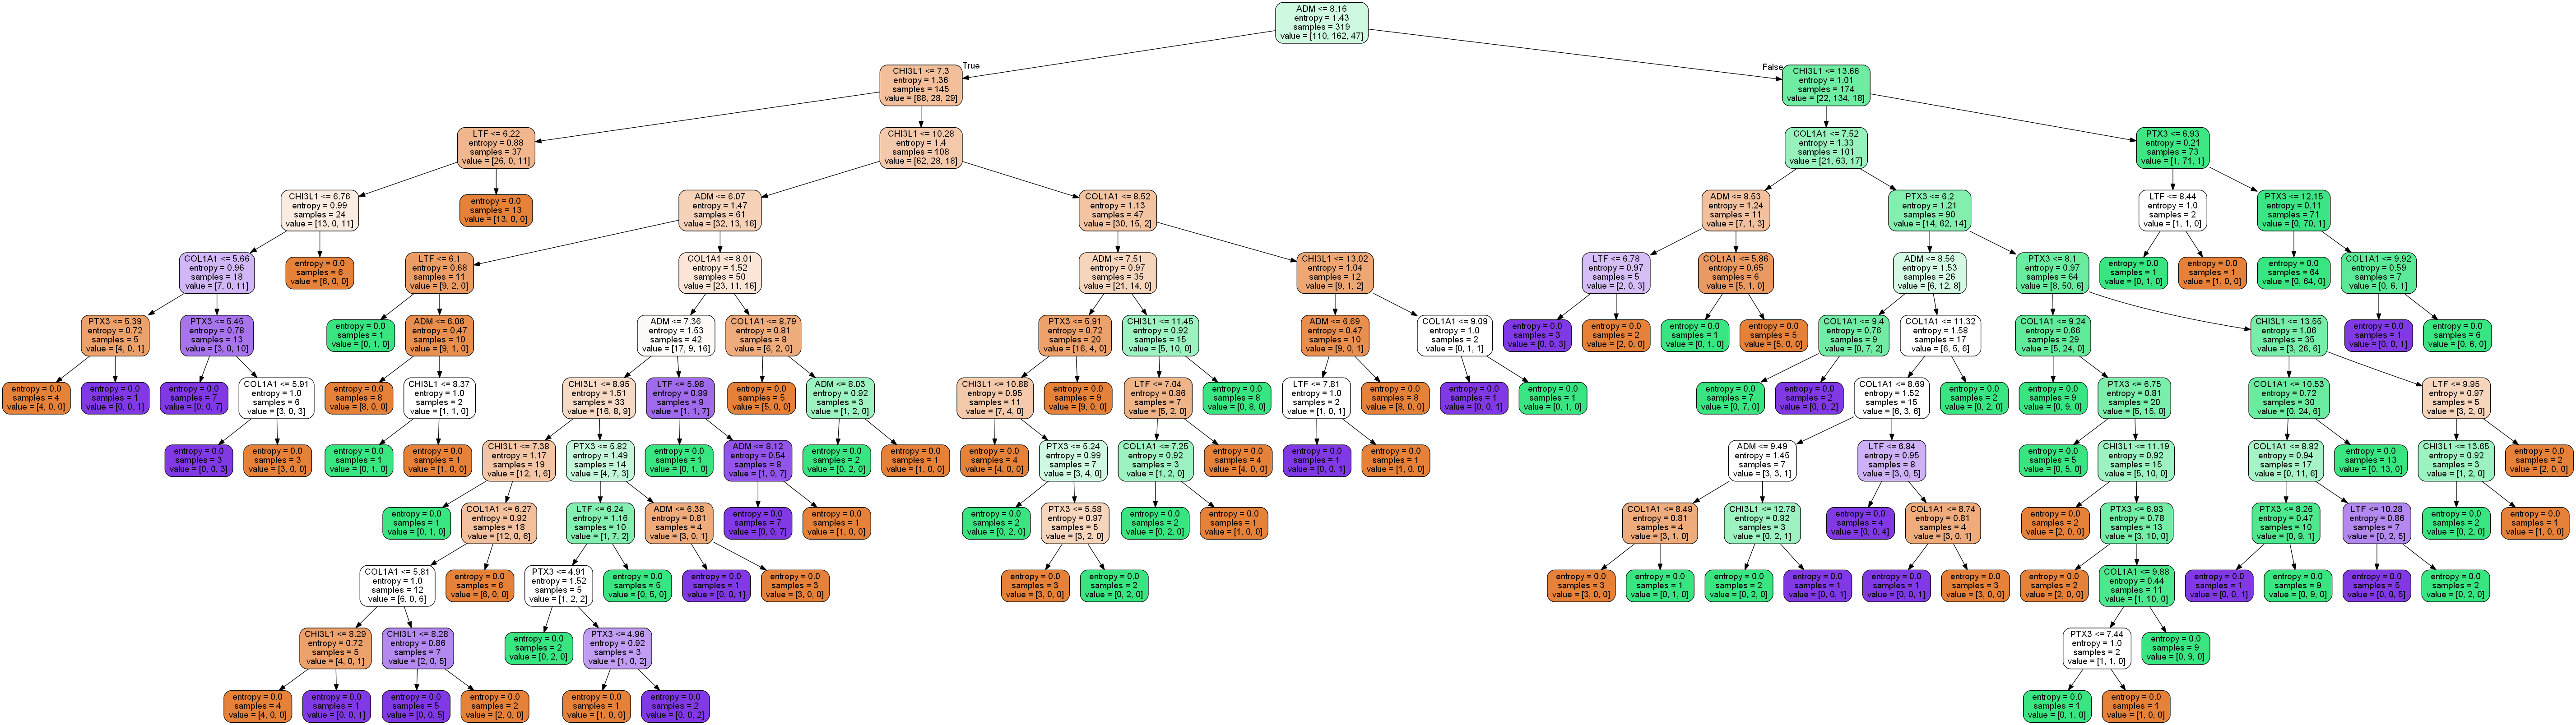

In [63]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image  
import pydotplus

clfD = DecisionTreeClassifier(criterion="entropy",random_state=0, max_depth=12)
cv = StratifiedKFold(n_splits=10, random_state=3, shuffle=True)
totScore=0
i=0
#print(dfSelectedX.head())
for train_index,test_index in cv.split(dfSelectedX,dfSelectedY):
    x_train, x_test = dfSelectedX.iloc[train_index], dfSelectedX.iloc[test_index]
    y_train, y_test = dfSelectedY.iloc[train_index], dfSelectedY.iloc[test_index]
    clfD.fit(dfSelectedX, dfSelectedY.values.ravel())
    predictions = clf.predict(x_test)

    predY = pd.DataFrame(predictions,index= y_test.index, columns=['Predicted_type'])
    #print(predY)

    finalPred = pd.concat([y_test,predY],axis=1)
    #print(finalPred)
    #print(multilabel_confusion_matrix(y_test, predictions))

    score = clfD.score(x_test, y_test)
    #print(score)
    
    totScore = totScore + score
    i=i+1
    
print("average", totScore/i)

from sklearn.tree import export_graphviz
# Export as dot file
dot_data = export_graphviz(clfD, 
                out_file=None, 
                feature_names=dfSelectedX.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())